<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Math_Final_Test_ipnyb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import approx_fprime
import math
import cmath
from scipy.optimize import minimize
%matplotlib inline
import pylab as pl
import warnings
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [0]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [0]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

In [24]:
# сразу все пары
pdist(raitings, metric='cosine')

array([0.17397081, 0.15078471, 0.21659884, 0.18082368, 0.25881452,
       0.27264172, 0.19032478, 0.08934018, 0.13989224, 0.18765675,
       0.15364663, 0.12861948, 0.17286893, 0.17370316, 0.19973997,
       0.17473692, 0.18031873, 0.15330626, 0.21605701, 0.20902015,
       0.32383777, 0.23710448, 0.17887923, 0.08126949, 0.30846591,
       0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ,
       0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211,
       0.25988199, 0.15548315, 0.19377124, 0.14485092, 0.17330826,
       0.18869956, 0.20845282, 0.2018724 , 0.16317771, 0.09906203])

In [14]:
# по отдельности
cdist(raitings[0:1], raitings[0:], metric='cosine')

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224]])

In [11]:
cdist(raitings[1:2], raitings[0:], metric='cosine')

array([[0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873]])

In [15]:
cdist(raitings[2:3], raitings[0:], metric='cosine')

array([[0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949]])

In [16]:
cdist(raitings[3:4], raitings[0:], metric='cosine')

array([[2.16598841e-01, 1.53646628e-01, 1.53306260e-01, 1.11022302e-16,
        3.08465911e-01, 2.13342081e-01, 1.67257893e-01, 1.70653334e-01,
        2.22933402e-01, 1.41131304e-01]])

In [17]:
cdist(raitings[4:5], raitings[0:], metric='cosine')

array([[1.80823679e-01, 1.28619478e-01, 2.16057013e-01, 3.08465911e-01,
        2.22044605e-16, 2.23556598e-01, 2.17995321e-01, 1.87631305e-01,
        1.20515228e-01, 1.54252108e-01]])

In [18]:
cdist(raitings[5:6], raitings[0:], metric='cosine')

array([[0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092]])

In [19]:
cdist(raitings[6:7], raitings[0:], metric='cosine')

array([[2.72641717e-01, 1.73703160e-01, 3.23837772e-01, 1.67257893e-01,
        2.17995321e-01, 2.59881992e-01, 2.22044605e-16, 1.73308264e-01,
        1.88699556e-01, 2.08452817e-01]])

In [20]:
cdist(raitings[7:8], raitings[0:], metric='cosine')

array([[0.19032478, 0.19973997, 0.23710448, 0.17065333, 0.18763131,
        0.15548315, 0.17330826, 0.        , 0.2018724 , 0.16317771]])

In [21]:
cdist(raitings[7:8], raitings[0:], metric='cosine')

array([[0.19032478, 0.19973997, 0.23710448, 0.17065333, 0.18763131,
        0.15548315, 0.17330826, 0.        , 0.2018724 , 0.16317771]])

In [22]:
cdist(raitings[8:9], raitings[0:], metric='cosine')

array([[0.08934018, 0.17473692, 0.17887923, 0.2229334 , 0.12051523,
        0.19377124, 0.18869956, 0.2018724 , 0.        , 0.09906203]])

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [0]:
raitings = pd.DataFrame(raitings)
raitings.columns = ('n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15')

In [0]:
X = raitings.drop('n15', axis = 1)
X

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,4,4,9,4,1,6,10,7,9,6,9,2,8,6
1,9,2,5,10,7,8,10,5,6,2,1,6,8,9
2,1,6,8,8,4,9,3,8,10,5,2,6,8,1
3,6,1,9,7,7,9,2,3,5,1,6,6,3,2
4,3,7,3,5,7,9,9,6,2,9,1,2,8,10
5,8,3,7,3,8,6,1,8,8,6,1,9,4,10
6,9,8,4,8,8,10,6,1,1,2,9,5,2,7
7,4,1,6,4,3,10,4,4,2,8,7,9,3,8
8,2,7,7,6,10,6,8,9,8,6,10,1,7,10
9,5,10,8,8,9,7,2,9,9,10,8,8,8,6


In [0]:
y = raitings['n15']
y

0     6
1     7
2     6
3     7
4     6
5     1
6     2
7     3
8     4
9    10
Name: n15, dtype: int64

In [0]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.7800209720671962

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на 

---

бумаге (просто подставить точку в производную и ничего не упрощать).

In [0]:
import numpy as np
from scipy.misc import derivative
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3))**2
print(derivative(f, 1.0, dx=1e-6, n=0, order=5))

4.381853728061273


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [0]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [0]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [0]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

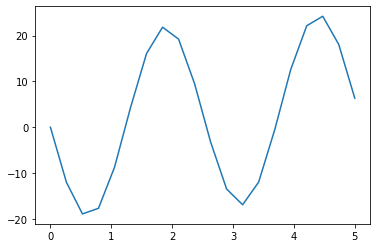

In [0]:
plt.plot(x, fx)
plt.show()

In [0]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

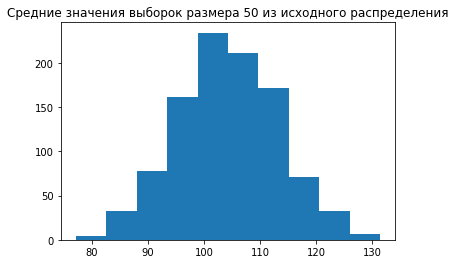

In [0]:
elements = np.random.randint(0, 200, 20) 
samples = [ np.mean(np.random.choice(elements, 50)) for _ in range(1000) ]

plt.hist(samples)
plt.title('Средние значения выборок размера 50 из исходного распределения')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [0]:
m = np.array([[1, 4],  
              [1, 1]]) 
print(m)

[[1 4]
 [1 1]]


In [0]:
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))